<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 

Basado en material de Pedro Pury y  Sebastian Raschka (sraschka@wisc.edu) Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

#  Minería de datos- Arboles de decisión

In [26]:
from IPython.display import Image

### Recuerde el problema del  consultorio oftalmológico del práctico de Mineria de Datos. Lo datos puede levantarse del siguiente archivo



In [27]:
import pandas as pd

df = pd.read_csv('/home/floormolina99/Aprendizaje Automatico/data/tablamineria.csv',sep=';')
df.head()

,paciente,edad,prescripcion,astigmatismo,lagrimeo,lentes
0,1,22,miopia,no,reducido,nada
1,2,71,miopia,si,normal,duras
2,3,41,hipermetropia,no,reducido,nada
3,4,32,miopia,si,normal,duras
4,5,68,hipermetropia,si,reducido,nada


### Problema 1: 

### Calcule el árbol de decision con la tabla mineria de datos usando entropia (information gain) y Gini index con sklearn y a mano (realizando todas las cuentas). Compare con el arbol que creó antes usando hipótesis maximales. Encuentre las variables que no utilizó. 




In [28]:
df = df.replace(to_replace='miopia',value=0,regex=True)
df = df.replace(to_replace='hipermetropia',value=1,regex=True)
df = df.replace(to_replace='reducido',value=0,regex=True)
df = df.replace(to_replace='normal',value=1,regex=True)
df['astigmatismo'] = (df['astigmatismo'] == 'si').astype(bool)
df.head()

,paciente,edad,prescripcion,astigmatismo,lagrimeo,lentes
0,1,22,0,False,0,nada
1,2,71,0,True,1,duras
2,3,41,1,False,0,nada
3,4,32,0,True,1,duras
4,5,68,1,True,0,nada


In [29]:
features = df[["edad","prescripcion","astigmatismo","lagrimeo"]]
target = df["lentes"]

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(features,target)
print("The prediction accuracy is: ",model_entropy.score(features,target)*100,"%")
# prediction = model.predict(test_features)

The prediction accuracy is:  100.0 %


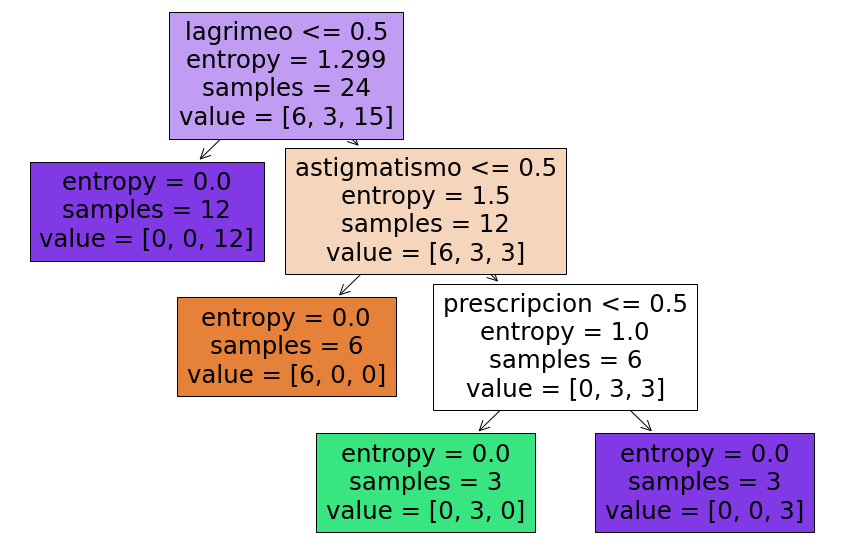

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_entropy,feature_names=["edad","prescripcion","astigmatismo","lagrimeo"], filled=True)
plt.show()

In [32]:
model_gini = DecisionTreeClassifier(criterion = 'gini').fit(features,target)
print("The prediction accuracy is: ",model_gini.score(features,target)*100,"%")
# prediction = model.predict(test_features)

The prediction accuracy is:  100.0 %


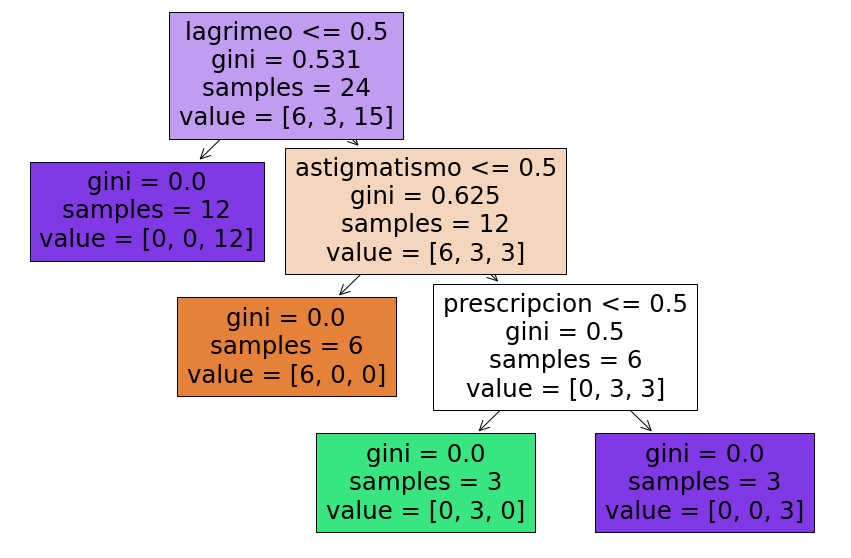

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(model_gini,feature_names=["edad","prescripcion","astigmatismo","lagrimeo"],filled=True)
plt.show()

Los árboles a los que se llega con sklearn y los que hicimos a mano en el practico anterior son iguales. Al igual que antes, la variable que no se utilizo es la edad.

### Problema 2:

### Al entrar al bar, sus cinco amigos, quienes se reúnen al salir de trabajar, ya tiene sus bebidas sobre la mesa. María que tiene un cargo de gerente paga la ronda la mitad de las veces. Pablo paga la ronda la cuarta parte de las veces, mientras que Sara y Carlos que son becarios pagan indistintamente entre ambos la octava parte de las veces. Juan nunca sacó la billetera desde que se reúnen los viernes.



### a)  ¿Qué fracción de las veces ud.\ paga la ronda?

Maria paga con probabilidad 1/2, Pablo paga con probabilidad 1/4, Sara y Carlos pagan con probabilidad 1/8 entre ambos y Juan paga con probabilidad cero, entonces yo pago con probabilidad 1-1/2-1/4-1/8=1/8, o sea pagamos con 12.5% de probabilidad.

### b) Calcular la entropía de la distribución de probabilidad con la que cada uno paga la ronda. ¿Cuál es el número medio de preguntas (de respuesta binaria) que necesitan hacerse para saber quién paga la ronda?


In [36]:
import numpy as np

In [39]:
entropy_maria = -0.5*np.log2(0.5)-0.5*np.log2(0.5)
entropy_pablo = -0.25*np.log2(0.25)-0.75*np.log2(0.75)
entropy_saracarlos = -0.125*np.log2(0.125) - 0.875*np.log2(0.875) 
entropy_yo = entropy_saracarlos
print('La entropia de la distribución de probabilidad con la que paga Maria es ', entropy_maria)
print('La entropia de la distribución de probabilidad con la que paga Pablo es ', entropy_pablo)
print('La entropia de la distribución de probabilidad con la que pagan Sara y Carlos es ', entropy_saracarlos)
print('La entropia de la distribución de probabilidad con la que pago yo es ', entropy_yo)

La entropia de la distribución de probabilidad con la que paga Maria es  1.0
La entropia de la distribución de probabilidad con la que paga Pablo es  0.8112781244591328
La entropia de la distribución de probabilidad con la que pagan Sara y Carlos es  0.5435644431995964
La entropia de la distribución de probabilidad con la que pago yo es  0.5435644431995964


### c)  Poco después de arribar al bar se suman dos antiguos amigos quienes no vivieron en la ciudad el último año. Ellos deciden que la próxima ronda la debe pagar ud.\ y conociendo que cursa esta materia, lo desafían a predecir que bebida tomará cada uno.


### d)  Usando la información de las tres variables binarias: nsexo, si es o no estudiante y si le gusta o no bailar, y recordando la elección de bebidas de la noche anterior, puede construirse la siguiente tabla:


    |Bebida | Género | Estudiante | Baile |
    ---------------------------------------------
    cerveza | M      | T          | T  
    cerveza | M      | F          | T  
    vodka   | M      | F          | F  
    vodka   | M      | F          | F  
    vodka   | F      | T          | T  
    vodka   | F      | F          | F  
    vodka   | F      | T          | T 
    vodka   | F      | T          | T 
    -------------------------------------------------



### e) Usando entropía de información entrenar un árbol de decisión a partir de la tabla anterior. Registrar todos los valores calculados para elegir las variables en cada nodo del árbol.


In [40]:
data = {'Bebida': ['cerveza','cerveza','vodka','vodka','vodka','vodka','vodka','vodka']
        , 'Genero': ['M','M','M','M','F','F','F','F']
        , 'Estudiante': ['True','False','False','False','True','False','True','True']
        , 'Baile': ['True','True','False','False','True','False','True','True'] }

dataframe = pd.DataFrame(data)
dataframe

,Bebida,Genero,Estudiante,Baile
0,cerveza,M,True,True
1,cerveza,M,False,True
2,vodka,M,False,False
3,vodka,M,False,False
4,vodka,F,True,True
5,vodka,F,False,False
6,vodka,F,True,True
7,vodka,F,True,True


In [41]:
dataframe = dataframe.replace(to_replace='cerveza',value=0,regex=True)
dataframe = dataframe.replace(to_replace='vodka',value=1,regex=True)
dataframe = dataframe.replace(to_replace='M',value=0,regex=True)
dataframe = dataframe.replace(to_replace='F',value=1,regex=True)
dataframe['Estudiante'] = (dataframe['Estudiante'] == 'si').astype(bool)
dataframe['Baile'] = (dataframe['Baile'] == 'si').astype(bool)
dataframe.head()

,Bebida,Genero,Estudiante,Baile
0,0,0,False,False
1,0,0,False,False
2,1,0,False,False
3,1,0,False,False
4,1,1,False,False


In [45]:
features = dataframe[["Genero","Estudiante","Baile"]]
target = dataframe["Bebida"]

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(features,target)
print("The prediction accuracy is: ",model_entropy.score(features,target)*100,"%")
# prediction = model.predict(test_features)

The prediction accuracy is:  75.0 %


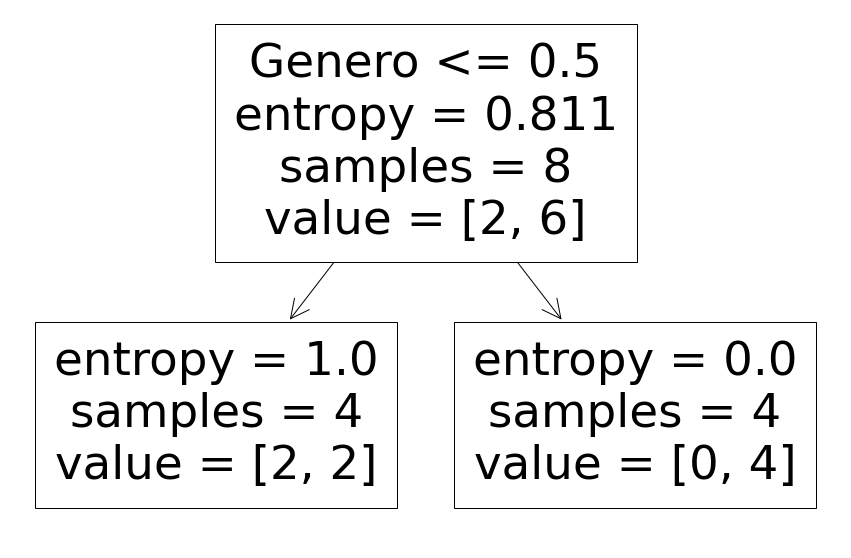

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_entropy,feature_names=["Genero","Estudiante","Baile"])
plt.show()

### f)  Proponer una poda del árbol y justificarla.

No se me ocurre una poda del arbol. 

<br>
<br>